# Callback Functions



---



# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.15.0'

# Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
# importing some important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("wine.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# No null value found

In [8]:
# encoding the categorical feature - 'quality' , which we are going to convernt in binary.
#it is our target varibale as well

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

encoded_data=encoder.fit_transform(df['quality'])

In [9]:
df['quality']= encoded_data

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**Now we can see the categorical data is converted to a binary class**

# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [11]:
# Separate features (X) and target variable (y)
x = df.drop(['quality'], axis=1)
y = df['quality']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y , test_size=0.33 , random_state=42)

In [15]:
# we further dividing the train data into validation data. We take last 71 records.
x_valid = x_train[:71]
y_valid = y_train[:71]

In [18]:
# reassigning the train data

x_train = x_train[71:]
y_train = y_train [71:]

In [19]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x_train_scaled= scaler.fit_transform(x_train)
x_valid_scaled= scaler.transform(x_valid)
x_test_scaled=scaler.transform(x_test)

In [20]:
print(x_train_scaled.shape)
print(y_train.shape)


(1000, 11)
(1000,)


In [21]:
print(x_valid.shape)
print(y_valid.shape)

(71, 11)
(71,)


# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [23]:
layers= [
    tf.keras.layers.Flatten( input_shape= (11,), name = 'inputlayer'),
    tf.keras.layers.Dense(50,activation='relu' , name='hiddenlayer1'),
    tf.keras.layers.Dense(10,activation='relu',name= 'hiddenlayer2'),
    tf.keras.layers.Dense(1, activation= 'sigmoid', name='outputlayer')
]

# Q8. Create a Sequential model and add all the layers to it.

In [24]:
model_classifier= tf.keras.models.Sequential(layers)

In [25]:
model_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenlayer1 (Dense)        (None, 50)                600       
                                                                 
 hiddenlayer2 (Dense)        (None, 10)                510       
                                                                 
 outputlayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [42]:
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir= 'logs')

# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [43]:
early_stoping_cb=tf.keras.callbacks.EarlyStopping(patience=5 , restore_best_weights=True)

# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [44]:
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint( "keras_modelh5.h5", save_best_only=True)

# Q12. Print the model summary.

In [37]:
model_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenlayer1 (Dense)        (None, 50)                600       
                                                                 
 hiddenlayer2 (Dense)        (None, 10)                510       
                                                                 
 outputlayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [40]:
optimizer= 'adam'
loss_function= 'binary_crossentropy'
metrics= 'accuracy'

# Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [41]:
model_classifier.compile(optimizer=optimizer, loss= loss_function, metrics=metrics)

#Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [47]:
callbacks = [ tensorboard_cb , early_stoping_cb , model_checkpoint_cb ]

validation =(x_valid ,y_valid)

history = model_classifier.fit(x_train_scaled,y_train , epochs=30 , validation_data= validation, callbacks=callbacks)


Epoch 1/30
32/32 [==============================] - 1s 16ms/step - loss: 0.3431 - accuracy: 0.8400 - val_loss: 7.4507 - val_accuracy: 0.5775
Epoch 2/30
32/32 [==============================] - 0s 13ms/step - loss: 0.3360 - accuracy: 0.8490 - val_loss: 6.3676 - val_accuracy: 0.6056
Epoch 3/30
16/32 [==============>...............] - ETA: 0s - loss: 0.3429 - accuracy: 0.8320

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 0s 11ms/step - loss: 0.3391 - accuracy: 0.8440 - val_loss: 6.5643 - val_accuracy: 0.6056
Epoch 4/30
32/32 [==============================] - 1s 18ms/step - loss: 0.3370 - accuracy: 0.8390 - val_loss: 6.6355 - val_accuracy: 0.5915
Epoch 5/30
32/32 [==============================] - 0s 7ms/step - loss: 0.3317 - accuracy: 0.8500 - val_loss: 7.3557 - val_accuracy: 0.5775
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.8420 - val_loss: 7.2228 - val_accuracy: 0.5775
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.3337 - accuracy: 0.8530 - val_loss: 6.8695 - val_accuracy: 0.6056




# Q17. Store the model's training history as a Pandas DataFrame.

In [48]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.343079,0.840,7.450739,0.577465
1,0.336008,0.849,6.367598,0.605634
2,0.339063,0.844,6.564297,0.605634
3,0.337028,0.839,6.635528,0.591549
4,0.331688,0.850,7.355685,0.577465
5,0.334406,0.842,7.222814,0.577465
6,0.333653,0.853,6.869479,0.605634


# Q18. Plot the model's training history.

<Axes: >

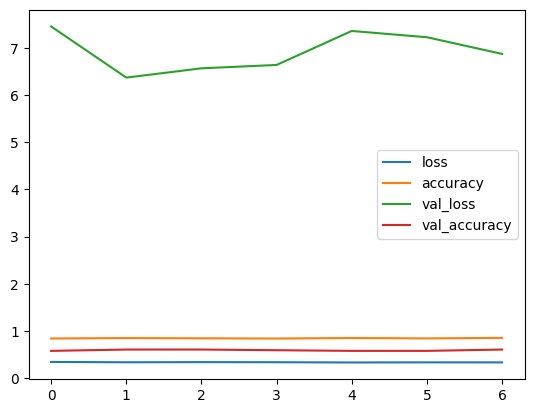

In [49]:
pd.DataFrame(history.history).plot()

# Q19. Evaluate the model's performance using the test data.

In [50]:
model_classifier.evaluate(x_test , y_test)

17/17 [==============================] - 0s 4ms/step - loss: 8.3795 - accuracy: 0.5511


[8.37947940826416, 0.5511363744735718]